### Data loading and Inspection

In [1]:
import pandas as pd

# Load data 
df = pd.read_csv("db_file.csv")  

# get the shape info 
print("Shape:", df.shape)
# get column info
print("Columns:", df.columns.tolist())
# get overall df info
print("Df Info:", df.info())

# Preview
df.head(7)

Shape: (4487, 1)
Columns: ['product_name']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  4487 non-null   object
dtypes: object(1)
memory usage: 35.2+ KB
Df Info: None


,product_name
0,JK LAKSHMI WHITE CEMENT
1,JKC WALLMAXX WHITE CEMENT
2,RASHMI STEEL FE415
3,RASHMI STEEL FE415 D
4,RASHMI STEEL FE500
5,RUNGTA STEEL FE500
6,7 STAR FE500


### Exploratory Data Analysis (EDA)

In [4]:
# Histograms will be only 1 as essentially only one feature is int64
import matplotlib.pyplot as plt
import seaborn as sns

# Check for nulls
df.isnull().sum().sort_values(ascending=False)

# Frequency counts
for col in ['product_name']:
    print(f"\nTop values in {col}:")
    print(df[col].value_counts().head(10))

# Correlation heatmap is not required.


Top values in product_name:
product_name
JK LAKSHMI WHITE CEMENT                             1
OrientBell 600x600 BHF Smoky Beige FT               1
OrientBell 600x600 BHF Cloudy Marengo FT            1
OrientBell 600x600 BHF Cloudy 3D Grey HL FT         1
OrientBell 600x600 BHF Geometric Slate Ash HL FT    1
OrientBell 600x600 BHF Slate Ash FT                 1
OrientBell 600x600 BHF Droplets Ghost White FT      1
OrientBell 600x600 BHF Smoky Creama FT              1
OrientBell 600x600 BHF Cloudy Beige FT              1
OrientBell 600x600 BHF Onyx White FT                1
Name: count, dtype: int64


In [6]:
# Frequency counts
for col in ['product_name']:
    print(f"\nTop values in {col}:")
    print(df[col].value_counts().head(20))


Top values in product_name:
product_name
JK LAKSHMI WHITE CEMENT                                 1
OrientBell 600x600 BHF Smoky Beige FT                   1
OrientBell 600x600 BHF Cloudy Marengo FT                1
OrientBell 600x600 BHF Cloudy 3D Grey HL FT             1
OrientBell 600x600 BHF Geometric Slate Ash HL FT        1
OrientBell 600x600 BHF Slate Ash FT                     1
OrientBell 600x600 BHF Droplets Ghost White FT          1
OrientBell 600x600 BHF Smoky Creama FT                  1
OrientBell 600x600 BHF Cloudy Beige FT                  1
OrientBell 600x600 BHF Onyx White FT                    1
OrientBell 600x600 BHF Cloudy Cotto FT                  1
OrientBell 600x600 BHF Cloudy Ornamental Cotto HL FT    1
OrientBell 600x600 BHF Herringbone Bricks Cotto FT      1
OrientBell 600x600 BHF Foggy Grey LT FT                 1
OrientBell 600x600 BHF Ceppo Stone Blue FT              1
OrientBell 600x600 BHF Foggy Grey DK FT                 1
OrientBell 600x600 BHF Onyx Cr

In [7]:
df['product_name'].nunique()

4487

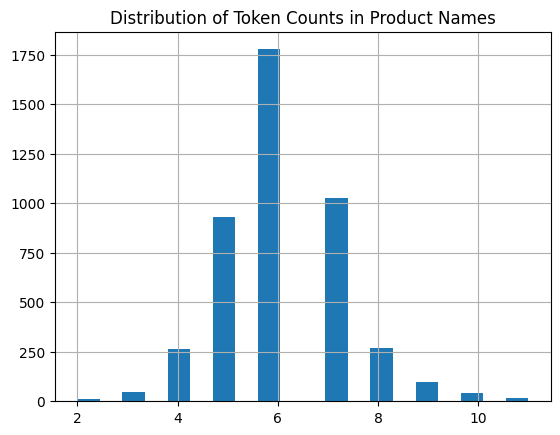

0                            [JK, LAKSHMI, WHITE, CEMENT]
1                          [JKC, WALLMAXX, WHITE, CEMENT]
2                                  [RASHMI, STEEL, FE415]
3                               [RASHMI, STEEL, FE415, D]
4                                  [RASHMI, STEEL, FE500]
                              ...                        
4482    [OrientBell, 600x1200, Ashstone, Battleship, G...
4483    [OrientBell, 600x1200, Slate, Punch, Ashstone,...
4484    [OrientBell, 600x1200, Stream, Pebble, Strip, ...
4485    [OrientBell, 600x1200, Canyon, Mocha, Strip, P...
4486         [OrientBell, 600x1200, Fossil, Strip, Punch]
Name: tokens, Length: 4487, dtype: object

In [8]:
# Don't overwrite the original — keep as parallel analysis
df['tokens'] = df['product_name'].apply(lambda x: x.split())

# Optional analysis:
df['num_tokens'] = df['tokens'].apply(len)
df['num_tokens'].hist(bins=20)
plt.title("Distribution of Token Counts in Product Names")
plt.show()

df['tokens']

Instead of relying on one noisy or incomplete field, we build a composite textual representation that combines descriptive and identifier-level data. This gives our fuzzy matcher the same context a human would rely on to recognize similar products.

### Cleaning (incl. of normalizing)

Normalize test: all lowercase, ASCII, etc.

In [9]:
import re
import unicodedata

def normalize(text):
    if pd.isna(text):
        return ""
    text = unicodedata.normalize("NFKD", str(text))
    text = text.encode("ASCII", "ignore").decode("utf-8")
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


In [10]:
# Apply Normalization
# Apply to core columns
df['product_name'] = df['product_name'].apply(normalize)

df['product_name']

0                                 jk lakshmi white cement
1                               jkc wallmaxx white cement
2                                      rashmi steel fe415
3                                    rashmi steel fe415 d
4                                      rashmi steel fe500
                              ...                        
4482    orientbell 600x1200 ashstone battleship grey s...
4483    orientbell 600x1200 slate punch ashstone grey ...
4484        orientbell 600x1200 stream pebble strip punch
4485         orientbell 600x1200 canyon mocha strip punch
4486               orientbell 600x1200 fossil strip punch
Name: product_name, Length: 4487, dtype: object

### Finalized one column case column

In [14]:
# Drop duplicates just to be extra safe
df_final = df[['product_name']].drop_duplicates().reset_index(drop=True)

df_final.head(25)

,product_name
0,jk lakshmi white cement
1,jkc wallmaxx white cement
2,rashmi steel fe415
3,rashmi steel fe415 d
4,rashmi steel fe500
5,rungta steel fe500
6,7 star fe500
7,jindal panther fe500 d
8,rashmi steel fe500 d
9,rungta steel fe500 d


In [13]:
# Export to CSV
df_final.to_csv("product_clean.csv", index=False)

print(f"✅ Exported {len(df_final)} clean product entries to product_clean.csv")

✅ Exported 4485 clean product entries to product_clean.csv
